<a href="https://colab.research.google.com/github/hjamiec02/Neural_Network_Charity_Analysis/blob/main/AlphabetSoupCharity_Optimzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Import and read the charity_data.csv.
import pandas as pd 


In [4]:
# Read in our ramen data
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data (6).csv


In [5]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# look at data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [7]:
# check the shape
application_df.shape

(34299, 12)

In [8]:
# Drop the non-beneficial ID columns, 'EIN' D3.2 Keep 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(["EIN"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES  HERE
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [10]:
# Drop additional non-beneficial columns "STATUS" and "SPECIAL_CONSIDERATIONS" D3.1
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [11]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

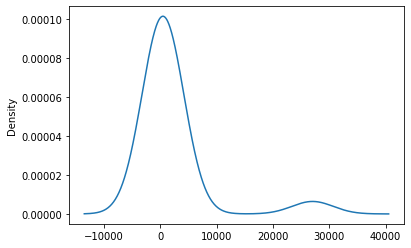

In [12]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_counts.plot.density()

In [13]:
# Determine which values to replace
list(application_counts[application_counts < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [14]:
# Determine which values to replace if counts are less than ...? Less than 100
#  YOUR CODE GOES HERE
# Determine which values to replace
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

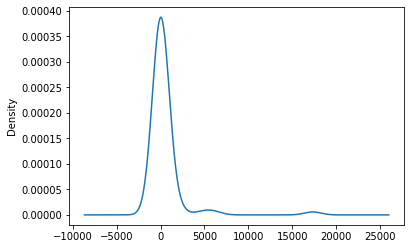

In [16]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
class_counts.plot.density()

In [17]:
class_counts[class_counts < 1000]

C7000    777
C1700    287
C4000    194
C5000    116
C1270    114
        ... 
C4120      1
C8210      1
C2561      1
C4500      1
C2150      1
Name: CLASSIFICATION, Length: 66, dtype: int64

In [18]:
# Determine which values to replace if counts are less than ..? less than 1000
#  YOUR CODE GOES HERE
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

## Bin Names D3.2

In [22]:
# look at the NAME Value counts
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

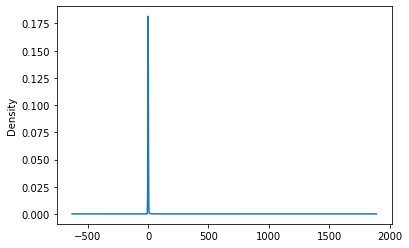

In [23]:
# look at density plot for NAME Distribution
name_counts.plot.density()

In [24]:
# how many NAMES are there with only 1?
#name_counts[name_counts <=1]


In [25]:
# how many NAMES are there with less than 5?
name_counts[name_counts <=5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [26]:
# how many NAMES are there with less than 100 but greater than 5?
#name_counts[((name_counts <=100) & (name_counts >5))]

In [27]:
# how many greater than 100
#len(name_counts[name_counts >100])

In [28]:
# use binning technique to put those with  5 or less bin
#
# Determine which values to replace if counts are less than or equal to 5
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
  application_df["NAME"] = application_df["NAME"].replace(app, "other")

# Check binning success
application_df.NAME.value_counts()

other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [29]:
# also 5 or less in a small bucket
# Determine which values to replace if counts are less than or equal to 5
#replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
#for app in replace_application:
#  application_df["NAME"] = application_df["NAME"].replace(app, "Infrequent")

# Check binning success
#application_df.NAME.value_counts()

In [30]:
# Determine which values to replace if counts are greater than 100
#replace_application = list(name_counts[name_counts <= 100].index)

# Replace in dataframe
#for app in replace_application:
#  application_df["NAME"] = application_df["NAME"].replace(app, "Frequent")

# Check binning success
#application_df.NAME.value_counts()

In [31]:
# use bucket technique to put those with more than 100 into a bucket

#replace_application = list(name_counts[name_counts >100].index)

# Replace in dataframe
#for app in replace_application:
#  application_df["NAME"] = application_df["NAME"].replace(app, "Habitual")

# Check binning success
#application_df.NAME.value_counts()

In [32]:
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [33]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [34]:
# testing
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,other,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,other,T5,CompanySponsored,C3000,ProductDev,Association,0
3,other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,other,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,other,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,other,T3,CompanySponsored,C2000,Preservation,Association,0
34297,other,T5,Independent,C3000,ProductDev,Association,0


In [35]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
application_df.shape

(34299, 396)

In [38]:
# Check if all Numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 396 entries, ASK_AMT to INCOME_AMT_5M-10M
dtypes: float64(394), int64(2)
memory usage: 103.6 MB


In [39]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop(["IS_SUCCESSFUL"],1).values
y = application_df["IS_SUCCESSFUL"].values
# Split the preprocessed data into a training and testing dataset train_test_split
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3:Redefine model Compile, Train and Evaluate the Model

In [41]:
# testing 
len(X_train_scaled[0])

395

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
#3.2
#hidden_nodes_layer4 = 20 
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer 3.2
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1185)              469260    
                                                                 
 dense_1 (Dense)             (None, 790)               936940    
                                                                 
 dense_2 (Dense)             (None, 395)               312445    
                                                                 
 dense_3 (Dense)             (None, 1)                 396       
                                                                 
Total params: 1,719,041
Trainable params: 1,719,041
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [44]:
# Implement check points
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [55]:
# Create a callback that saves the model's weights every 5 epoch 
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= "epoch",
    period= 5)

In [56]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 20s 25ms/step - loss: 0.4175 - accuracy: 0.8052
Epoch 2/100
804/804 [==============================] - 20s 25ms/step - loss: 0.4106 - accuracy: 0.8063
Epoch 3/100
804/804 [==============================] - 20s 25ms/step - loss: 0.4059 - accuracy: 0.8062
Epoch 4/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4055 - accuracy: 0.8066
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8062
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 17s 21ms/step - loss: 0.4066 - accuracy: 0.8064
Epoch 6/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4070 - accuracy: 0.8062
Epoch 7/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4059 - accuracy: 0.8067
Epoch 8/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4063 - accuracy: 0.8072
Epoch 9/100
804/804 [=================

In [57]:
# Create dataframe containing training history
#history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
#history_df.plot(y="loss")

In [58]:
# Plot Accuracy
#history_df.plot(y="accuracy")

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.7680 - accuracy: 0.7882 - 2s/epoch - 7ms/step
Loss: 0.7680317759513855, Accuracy: 0.7882215976715088


In [60]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation.h5")
from google.colab import files
files.download("AlphabetSoupCharity_Optimzation.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Deliverable 3